In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [41]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [42]:
y.shape, tx.shape

((202,), (202, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [43]:
def mse_calculation(e_term):
    return 1/2*np.mean(e_term**2)
    
def compute_loss(y, tx, w):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    e_term = y - tx.dot(w)
    loss = mse_calculation(e_term)
    return loss
    # ***************************************************
    # raise NotImplementedError
    

# 2 Grid Search

Fill in the function `grid_search()` below:

In [44]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for i, row in enumerate(w0):
        for j, col in enumerate(w1):
            w = np.array([row,col])
            losses[i][j] = compute_loss(y, tx, w)
    return losses
    # ***************************************************
    # raise NotImplementedError
   

Let us play with the grid search demo now!

Grid Search: loss*=109.17758755205352, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.005 seconds


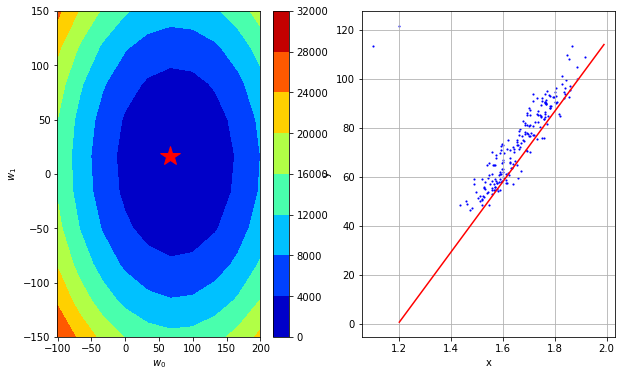

In [45]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [46]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    e_term = y - tx.dot(w)
    gradient = -tx.T.dot(e_term)/len(e_term)
    return gradient, e_term
    # ***************************************************
    # raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [47]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        grad, _ = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma * grad
        # ***************************************************
        # raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [48]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
Gradient Descent(1/49): loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
Gradient Descent(2/49): loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/49): loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
Gradient Descent(4/49): loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/49): loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/49): loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
Gradient Descent(7/49): loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
Gradient Descent(8/49): loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/49): loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
Gradient Descent(10/49): loss=65.93073020036948, w0=74.06767464603033, w1=11.034875

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

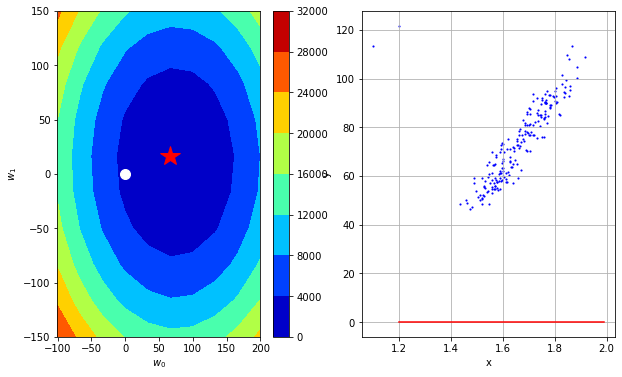

In [49]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [38]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    e_term = y - tx.dot(w)
    gradient = -tx.T.dot(e_term)/len(e_term)
    return gradient, e_term
    # ***************************************************
    # raise NotImplementedError


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    ws = [initial_w]
    losses = []
    w = initial_w
    for index_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size, num_batches=1):
            grad, _ = compute_stoch_gradient(y_batch, tx_batch, w)
            loss = compute_loss(y_batch, tx_batch, w)
            w = w - gamma * grad
            ws.append(w)
            losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=index_iter, ti=max_iters-1, l=loss, w0=w[0], w1=w[1]))
    # ***************************************************
    # raise NotImplementedError
    return losses, ws

In [39]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=1481.0696437689326, w0=38.09787724917956, w1=-30.697214639565843
Gradient Descent(1/49): loss=22.316626829366097, w0=42.77444589432728, w1=-33.519459024142684
Gradient Descent(2/49): loss=84.19671551969702, w0=33.690791276867245, w1=-26.032953749227026
Gradient Descent(3/49): loss=4.733618290019252, w0=31.536970039108905, w1=-24.024377856076324
Gradient Descent(4/49): loss=1026.0713979027892, w0=63.24737795109789, w1=-15.585114494239088
Gradient Descent(5/49): loss=520.4602904985518, w0=85.8316885380647, w1=-0.5820278625910404
Gradient Descent(6/49): loss=350.02399203580734, w0=67.31079460188842, w1=0.7224395831927335
Gradient Descent(7/49): loss=0.84400506543784, w0=66.40133049367464, w1=1.3076556761481275
Gradient Descent(8/49): loss=135.66115887547352, w0=54.871025393723286, w1=14.29691016368913
Gradient Descent(9/49): loss=455.0692538948873, w0=75.9889767341585, w1=50.89964486947679
Gradient Descent(10/49): loss=2063.668454863173, w0=31.01792953970339, 

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

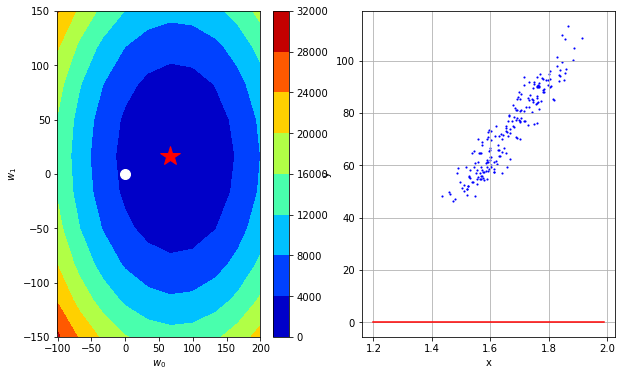

In [40]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers

### Exercise 5


In [ ]:
# Set the boolean values to True, for subsampling and adding outlier points to the training data.
# height, weight, gender = load_data(sub_sample=True, add_outlier=True)

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [50]:
# Calculate the Min Absolute Error in terms of e
def mae_calculation(e_term):
    return np.mean(np.abs(e_term))

# Calculate the loss
def compute_loss(y, tx, w):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    e_term = y - tx.dot(w)
    loss = mae_calculation(e_term)
    return loss
    # ***************************************************
    # raise NotImplementedError

In [52]:
# Calculate the gradient for MAE loss function
def compute_gradient(y, tx, w):
    e_term = y - tx.dot(w)
    no_offset_tx = np.concatenate(np.zeros(tx.shape[0],1), tx[:,1], axis=1)
    gradient = -tx.T.dot(np.sign(e_term))/len(e_term)
    return gradient, e_term

In [53]:
def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    ws = [initial_w]
    losses = []
    w = initial_w
    for index_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size, num_batches=1):
            grad, _ = compute_stoch_gradient(y_batch, tx_batch, w)
            loss = compute_loss(y_batch, tx_batch, w)
            w = w - gamma * grad
            ws.append(w)
            losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=index_iter, ti=max_iters-1, l=loss, w0=w[0], w1=w[1]))
    # ***************************************************
    # raise NotImplementedError
    return losses, ws

In [54]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=81.29793408647726, w0=56.90855386053408, w1=21.96169792587271
Gradient Descent(1/49): loss=13.977155655427978, w0=66.69256281933366, w1=31.99957849187619
Gradient Descent(2/49): loss=10.122886069329539, w0=59.606542570802986, w1=26.003611253140875
Gradient Descent(3/49): loss=1.7712982004201052, w0=60.84645131109706, w1=27.074417884336523
Gradient Descent(4/49): loss=1.7490824468605695, w0=59.62209359829466, w1=26.333609313098414
Gradient Descent(5/49): loss=28.590922226743544, w0=79.63573915701514, w1=-4.824635434680214
Gradient Descent(6/49): loss=0.1037909794948888, w0=79.70839284266157, w1=-4.767717031985578
Gradient Descent(7/49): loss=18.600295952649745, w0=92.72860000951638, w1=8.590333337333224
Gradient Descent(8/49): loss=4.616176096219178, w0=89.49727674216297, w1=2.2875475074396006
Gradient Descent(9/49): loss=33.393367553909705, w0=66.12191945442618, w1=25.779945823248926
Gradient Descent(10/49): loss=0.3061345307853287, w0=65.90762528287645, w1

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

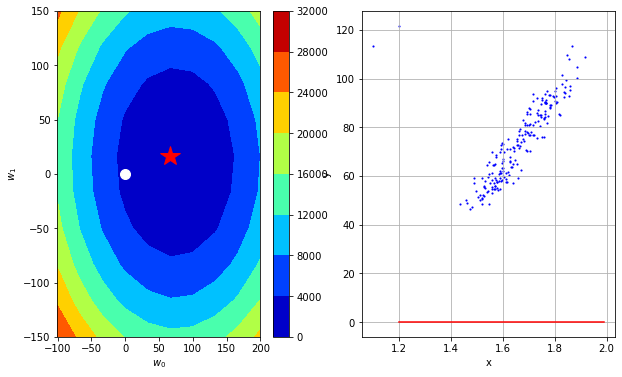

In [55]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))